In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from datetime import datetime, date # converting into date data

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

### Disclaimer. 

This notebook is focusing on implementing the theory of the time series analysis into the real dataset, not the accuracy of the model.

In [2]:
data = pd.read_csv("/Users/hyunminhong/Documents/Programmings/Python_Jupyter/Projects/water-analytics/dataset/Aquifer_Petrignano.csv")

In [3]:
data.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [4]:
print("The summary of null data:\n{}\n\nThe length of the dataset:\n{}".format(data.isnull().sum(), len(data)))

The summary of null data:
Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

The length of the dataset:
5223


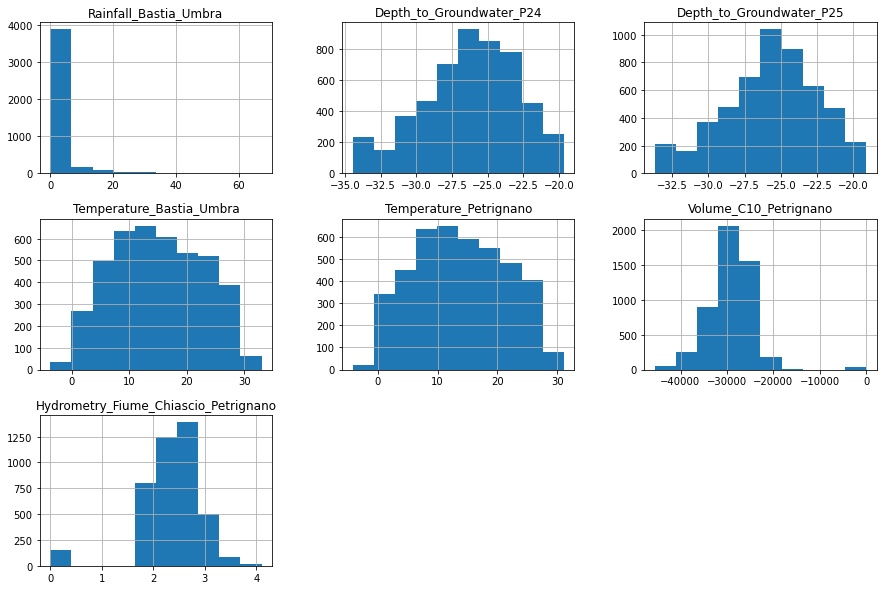

In [5]:
data.hist(figsize = (15,10))
plt.show()

Since the distributions of **Depth to Groundwater P24** and **Depth to Groundwater P25** have similar distributions, we drop one of the **depth** attributes with more null values. We do the same for the **temperature** attributes for simplicity. 

In [6]:
# drop the attributes for simplicity
data = data.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis = 1)

# drop the null values for rainfall due to too many null values
data = data[data['Rainfall_Bastia_Umbra'].notnull()].reset_index(drop = True)

# change the column names for simplicity
data.columns = ['Date', 'Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Volume', 'Hydrometry']

data.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Volume,Hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [7]:
print("The summary of null data:\n{}".format(data.isnull().sum()))

The summary of null data:
Date                     0
Rainfall                 0
Depth_to_Groundwater    27
Temperature              0
Volume                   1
Hydrometry               0
dtype: int64


Since we are working with time series data, the most important features are the time related features, which is plausible. Ideally, the data is already in **chronological order** and the **time stamps are equidistant** in time series. Luckily, the data is already prepared for us. 

In [8]:
data['Date'] = pd.to_datetime(data.Date, format = '%d/%m/%Y') # change to datetime64[ns] data type

data.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Volume,Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


Features: 
* Rainfall
* Temperature
* Volume
* Hydrometry

Target:
* Depth to Groundwater

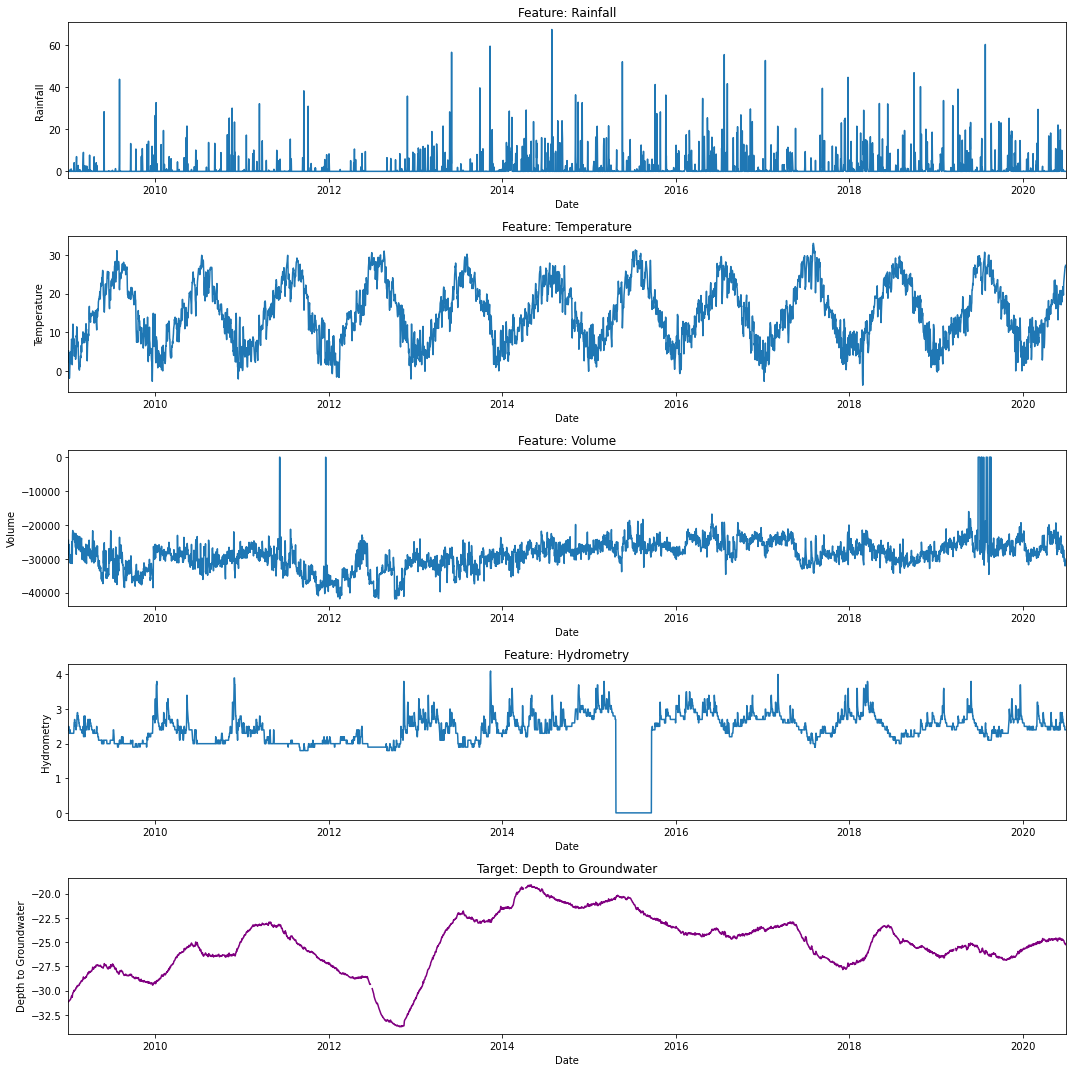

In [9]:
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (15, 15))

sns.lineplot(x = data.Date, y = data.Rainfall, 
             ax = ax[0])
ax[0].set_title('Feature: Rainfall')
ax[0].set_ylabel(ylabel = 'Rainfall')

sns.lineplot(x = data.Date, y = data.Temperature, 
             ax = ax[1])
ax[1].set_title('Feature: Temperature')
ax[1].set_ylabel(ylabel = 'Temperature')

sns.lineplot(x = data.Date, y = data.Volume.fillna(np.inf), 
             ax = ax[2])
ax[2].set_title('Feature: Volume')
ax[2].set_ylabel(ylabel = 'Volume')

sns.lineplot(x = data.Date, y = data.Hydrometry, 
             ax = ax[3])
ax[3].set_title('Feature: Hydrometry')
ax[3].set_ylabel(ylabel = 'Hydrometry')


sns.lineplot(x = data.Date, y = data.Depth_to_Groundwater.fillna(np.inf), 
             ax = ax[4], color = 'purple')
ax[4].set_title('Target: Depth to Groundwater')
ax[4].set_ylabel(ylabel = 'Depth to Groundwater')

for i in range(5):
    ax[i].set_xlim(min(data.Date), max(data.Date))

plt.tight_layout()
plt.show()

In [10]:
data.isnull().sum()

Date                     0
Rainfall                 0
Depth_to_Groundwater    27
Temperature              0
Volume                   1
Hydrometry               0
dtype: int64

In [11]:
data['Interval'] = data.Date - data.Date.shift(1)

# the data is already in chronological order and the time stamps are equidistant in time series
data['Interval'].value_counts() 

# after checking the time series data, we drop the column
data = data.drop('Interval', axis = 1)

From the above line plots, we can observe that **Volume** and **Hydrometry** have implausible zero values, and **Volume** and **Depth to Groundwater** have null values. Hence, we want to fill in some plausible values for these null and zero values. 

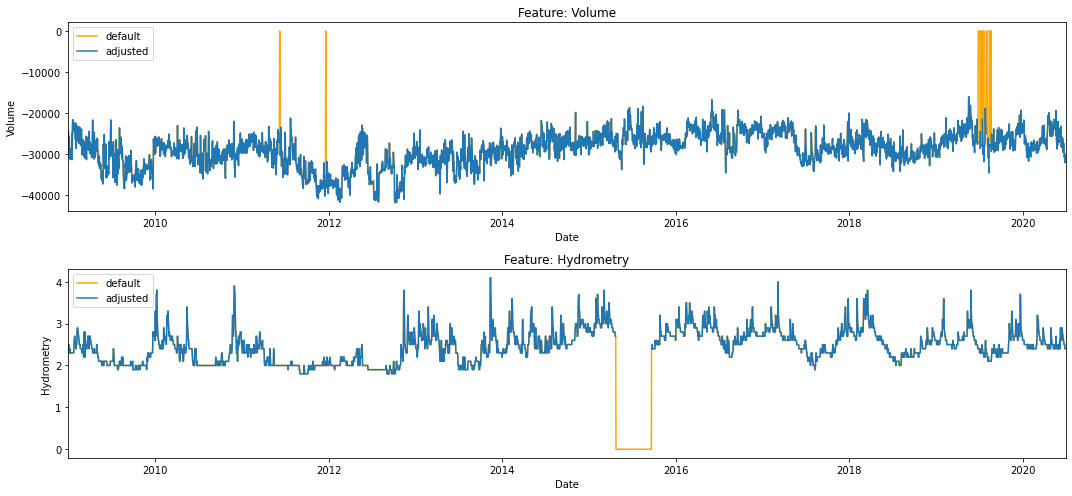

In [12]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 7))

temp = data.Volume.copy()
data['Volume'] = np.where(data.Volume == 0, np.nan, data.Volume) # np.where(condition, x, y) = if condition, then x. Otherwise y

sns.lineplot(x = data.Date, y = temp, 
             ax = ax[0], color = 'orange', label = 'default')
sns.lineplot(x = data.Date, y = data.Volume.fillna(np.inf), 
             ax = ax[0], label = 'adjusted')
ax[0].set_title('Feature: Volume')
ax[0].set_ylabel(ylabel = 'Volume')
ax[0].legend()


temp = data.Hydrometry.copy()
data['Hydrometry'] = np.where(data.Hydrometry == 0, np.nan, data.Hydrometry)

sns.lineplot(x = data.Date, y = temp, 
             ax = ax[1], color = 'orange', label = 'default')
sns.lineplot(x = data.Date, y = data.Hydrometry.fillna(np.inf), 
             ax = ax[1], label = 'adjusted')
ax[1].set_title('Feature: Hydrometry')
ax[1].set_ylabel(ylabel = 'Hydrometry')
ax[1].legend()

for i in range(2):
    ax[i].set_xlim(min(data.Date), max(data.Date))
    
plt.tight_layout()
plt.show()

Now we can handle these missing values and there are multiple options for replacing NaN values.

**Non-time-series specific method:**
* Mean imputation
* Median imputation
* Mode imputation

*appropriate for stationary time series, for example, white noise data*

* Random sample imputation

*it is not likely to work well unless the random select is carefully chosen*

**Time-Series specific method:**
* Last observation carried forward (LOCF)
* Next observation carried backward (NOCB)
* Linear interpolation
* Spline interpolation 

*these methods rely on the assumption that adjacent observations are similar to one another. These methods do not work well when this assumption is not valid, especially when the presence of strong seasonality*

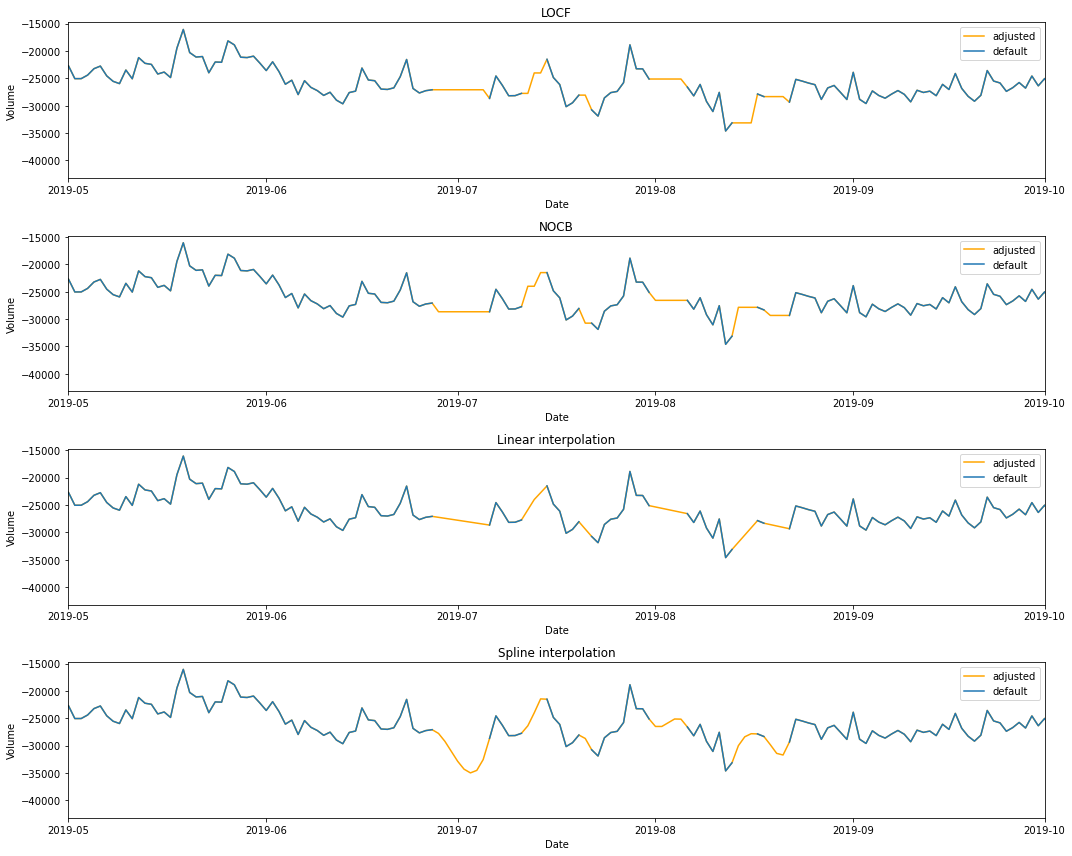

In [13]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 12))


# LOCF
sns.lineplot(x = data.Date, y = data.Volume.ffill(),
            ax = ax[0], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Volume.fillna(np.inf),
            ax = ax[0], label = 'default')
ax[0].set_title('LOCF')
ax[0].set_ylabel(ylabel = 'Volume')
ax[0].legend()


# NOCB
sns.lineplot(x = data.Date, y = data.Volume.bfill(), 
             ax = ax[1], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Volume.fillna(np.inf), 
             ax = ax[1], label = 'default')
ax[1].set_title('NOCB')
ax[1].set_ylabel(ylabel = 'Volume')
ax[1].legend()


# Linear interpolation
sns.lineplot(x = data.Date, y = data.Volume.interpolate(), 
             ax = ax[2], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Volume.fillna(np.inf), 
             ax = ax[2], label = 'default')
ax[2].set_title('Linear interpolation')
ax[2].set_ylabel(ylabel = 'Volume')
ax[2].legend()


# Spline interpolation
sns.lineplot(x = data.Date, y = data.Volume.interpolate(method = 'spline', order = 3), 
             ax = ax[3], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Volume.fillna(np.inf), 
             ax = ax[3], label = 'default')
ax[3].set_title('Spline interpolation')
ax[3].set_ylabel(ylabel = 'Volume')
ax[3].legend()

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()

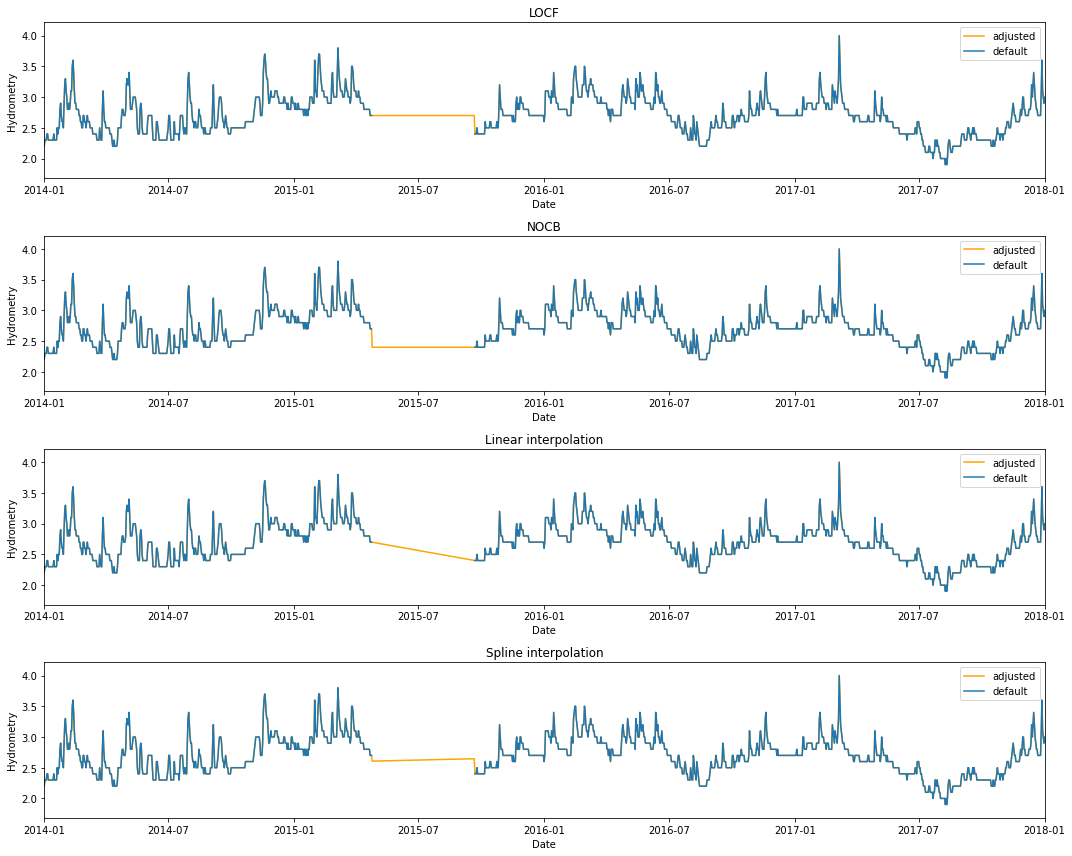

In [14]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 12))


# LOCF
sns.lineplot(x = data.Date, y = data.Hydrometry.ffill(),
            ax = ax[0], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Hydrometry.fillna(np.inf),
            ax = ax[0], label = 'default')
ax[0].set_title('LOCF')
ax[0].set_ylabel(ylabel = 'Hydrometry')
ax[0].legend()


# NOCB
sns.lineplot(x = data.Date, y = data.Hydrometry.bfill(), 
             ax = ax[1], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Hydrometry.fillna(np.inf), 
             ax = ax[1], label = 'default')
ax[1].set_title('NOCB')
ax[1].set_ylabel(ylabel = 'Hydrometry')
ax[1].legend()


# Linear interpolation
sns.lineplot(x = data.Date, y = data.Hydrometry.interpolate(), 
             ax = ax[2], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Hydrometry.fillna(np.inf), 
             ax = ax[2], label = 'default')
ax[2].set_title('Linear interpolation')
ax[2].set_ylabel(ylabel = 'Hydrometry')
ax[2].legend()


# Spline interpolation
sns.lineplot(x = data.Date, y = data.Hydrometry.interpolate(method = 'spline', order = 3), 
             ax = ax[3], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Hydrometry.fillna(np.inf), 
             ax = ax[3], label = 'default')
ax[3].set_title('Spline interpolation')
ax[3].set_ylabel(ylabel = 'Hydrometry')
ax[3].legend()

for i in range(4):
    ax[i].set_xlim([date(2014, 1, 1), date(2018, 1, 1)])
    
plt.tight_layout()
plt.show()

As the ground truth is not given, I will choose the **(spline) interpolation** based on the plots. 

In [15]:
data1 = data.copy()
data2 = data.copy()

# data1 uses spline interpolation 
data1['Depth_to_Groundwater'] = data.Depth_to_Groundwater.interpolate(method = 'spline', order = 3)
data1['Volume'] = data.Volume.interpolate(method = 'spline', order = 3)
data1['Hydrometry'] = data.Hydrometry.interpolate(method = 'spline', order = 3)

# data2 uses interpolation
data2['Depth_to_Groundwater'] = data.Depth_to_Groundwater.interpolate()
data2['Volume'] = data.Volume.interpolate()
data2['Hydrometry'] = data.Hydrometry.interpolate()

## data1 will be used primarily and then the result of data2 will be compared. 
data = data1

Before we model the time series data, we need to check whether the underlying data has **stationarity** or not. The reason of doing it is that there exists some time series models such as **ARIMA** assumes that the given data is stationary. 

**Stationarity** is defined by: 

The time series has
* constant time invariant mean;
* constant time invariant variance;
* constant time invariant covariance.

The definition of **stationarity** follows that the time series has no **trend** nor **seasonality** since **trend** indicates that the mean is non-constant over time and **seasonality** indicates that the variance is not constant over time.

The check for stationarity can be done via three different approaches:
* **Visual.** Plot time series and check for trends or seasonality
* **Basic statistics.** Split time series and compare the mean and variance of each partition
* **Statistical test.** Augmented Dickey Fuller test

But before doing the above, let us resample since we do not need to have a day-level precision. 

## Resampling

**Resampling.** Aggregates data based on specified frequency and aggregation function. 

There are two following resampling methods: 
* **Upsampling** is when the frequency of samples is increased (e.g. days to hours);
* **Downsampling** is when the frequency of samples is decreased (e.g. days to weeks).

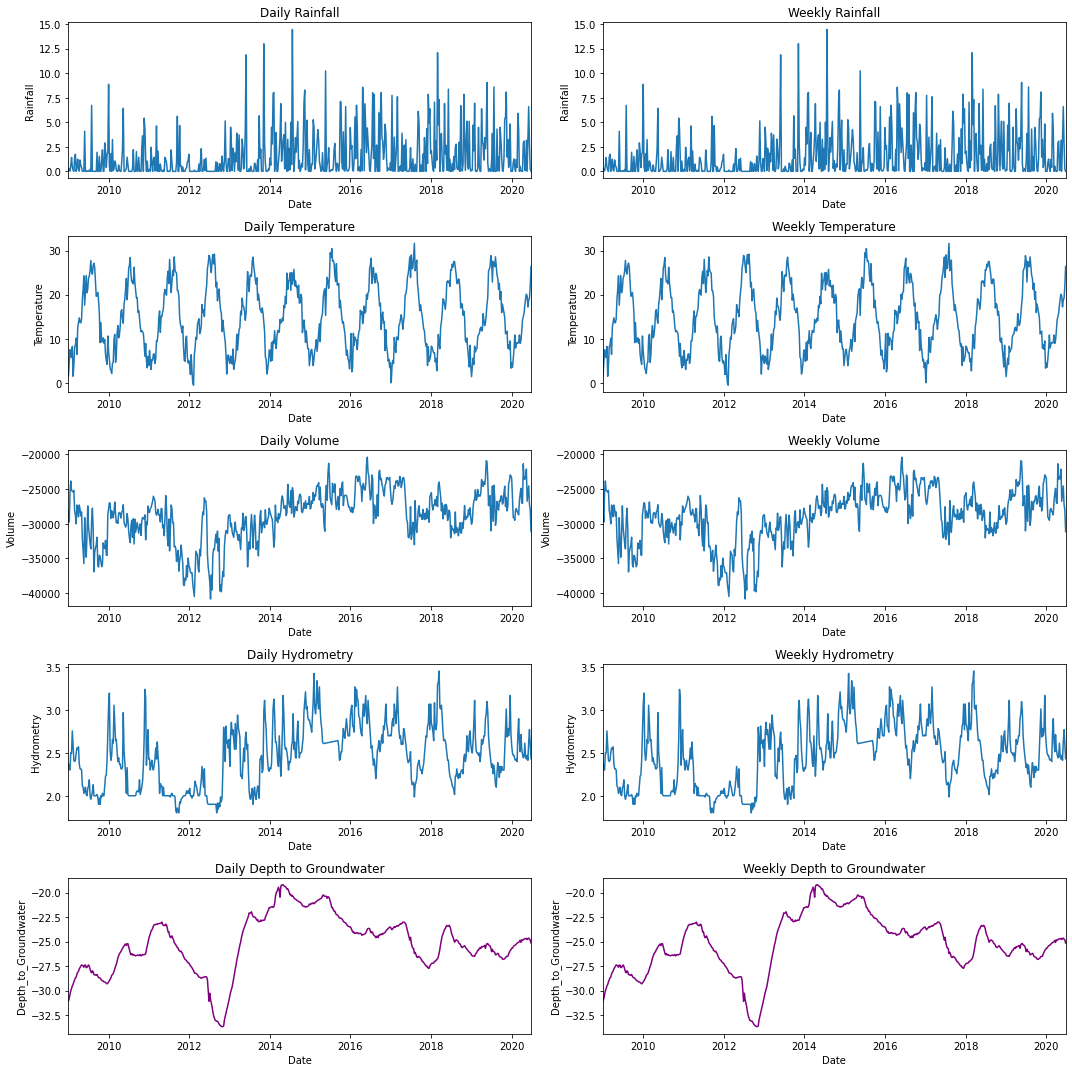

In [76]:
fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize = (15, 15))

# resample the given data to a weekly basis 
data_resampled = data.resample('7D', on = 'Date').mean().reset_index(drop=False)


# daily/weekly rainfall
sns.lineplot(x = data.Date, y = data.Rainfall, ax = ax[0, 0])
ax[0, 0].set_title('Daily Rainfall')

sns.lineplot(x = data_resampled.Date, y = data_resampled.Rainfall, ax = ax[0, 1])
ax[0, 1].set_title('Weekly Rainfall')


# daily/weekly temperature
sns.lineplot(x = data.Date, y = data.Temperature, ax = ax[1, 0])
ax[1, 0].set_title('Daily Temperature')

sns.lineplot(x = data_resampled.Date, y = data_resampled.Temperature, ax = ax[1, 1])
ax[1, 1].set_title('Weekly Temperature')


# daily/weekly volume
sns.lineplot(x = data.Date, y = data.Volume, ax = ax[2, 0])
ax[2, 0].set_title('Daily Volume')

sns.lineplot(x = data_resampled.Date, y = data_resampled.Volume, ax = ax[2, 1])
ax[2, 1].set_title('Weekly Volume')


# daily/weekly hydrometry
sns.lineplot(x = data.Date, y = data.Hydrometry, ax = ax[3, 0])
ax[3, 0].set_title('Daily Hydrometry')

sns.lineplot(x = data_resampled.Date, y = data_resampled.Hydrometry, ax = ax[3, 1])
ax[3, 1].set_title('Weekly Hydrometry')


# daily/weekly depth to groundwater
sns.lineplot(x = data.Date, y = data.Depth_to_Groundwater, ax = ax[4, 0], color = 'purple')
ax[4, 0].set_title('Daily Depth to Groundwater')

sns.lineplot(x = data_resampled.Date, y = data_resampled.Depth_to_Groundwater, ax = ax[4, 1], color = 'purple')
ax[4, 1].set_title('Weekly Depth to Groundwater')


for i in range(5):
    ax[i, 0].set_xlim(min(data.Date), max(data.Date))
    ax[i, 1].set_xlim(min(data.Date), max(data.Date))

plt.tight_layout()
plt.show()

We can see that the resampled data conveys the information sufficiently. Hence, we downsample the daily data to a weekly basis. 

In [57]:
data = data_resampled 

data.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Volume,Hydrometry
0,2009-01-01,0.000000,-31.048571,1.657143,-28164.918857,2.371429
1,2009-01-08,0.285714,-30.784286,4.571429,-29755.789714,2.314286
2,2009-01-15,0.028571,-30.420000,7.528571,-25463.190857,2.300000
3,2009-01-22,0.585714,-30.018571,6.214286,-23854.422857,2.500000
4,2009-01-29,1.414286,-29.790000,5.771429,-25210.532571,2.500000


## Visual 

In [58]:
data.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Volume,Hydrometry
0,2009-01-01,0.000000,-31.048571,1.657143,-28164.918857,2.371429
1,2009-01-08,0.285714,-30.784286,4.571429,-29755.789714,2.314286
2,2009-01-15,0.028571,-30.420000,7.528571,-25463.190857,2.300000
3,2009-01-22,0.585714,-30.018571,6.214286,-23854.422857,2.500000
4,2009-01-29,1.414286,-29.790000,5.771429,-25210.532571,2.500000


**Rolling** is an operator that creates **rolling windows** and performs analysis on the data in this windows, 

e.g., the first entry of `data.Rainfall.rolling(3).mean()` calculates the mean of the first three entries in `data.Rainfall`, 

i.e., the mean rainfall of 2009-01-01, 2009-01-08, 2009-01-15. 


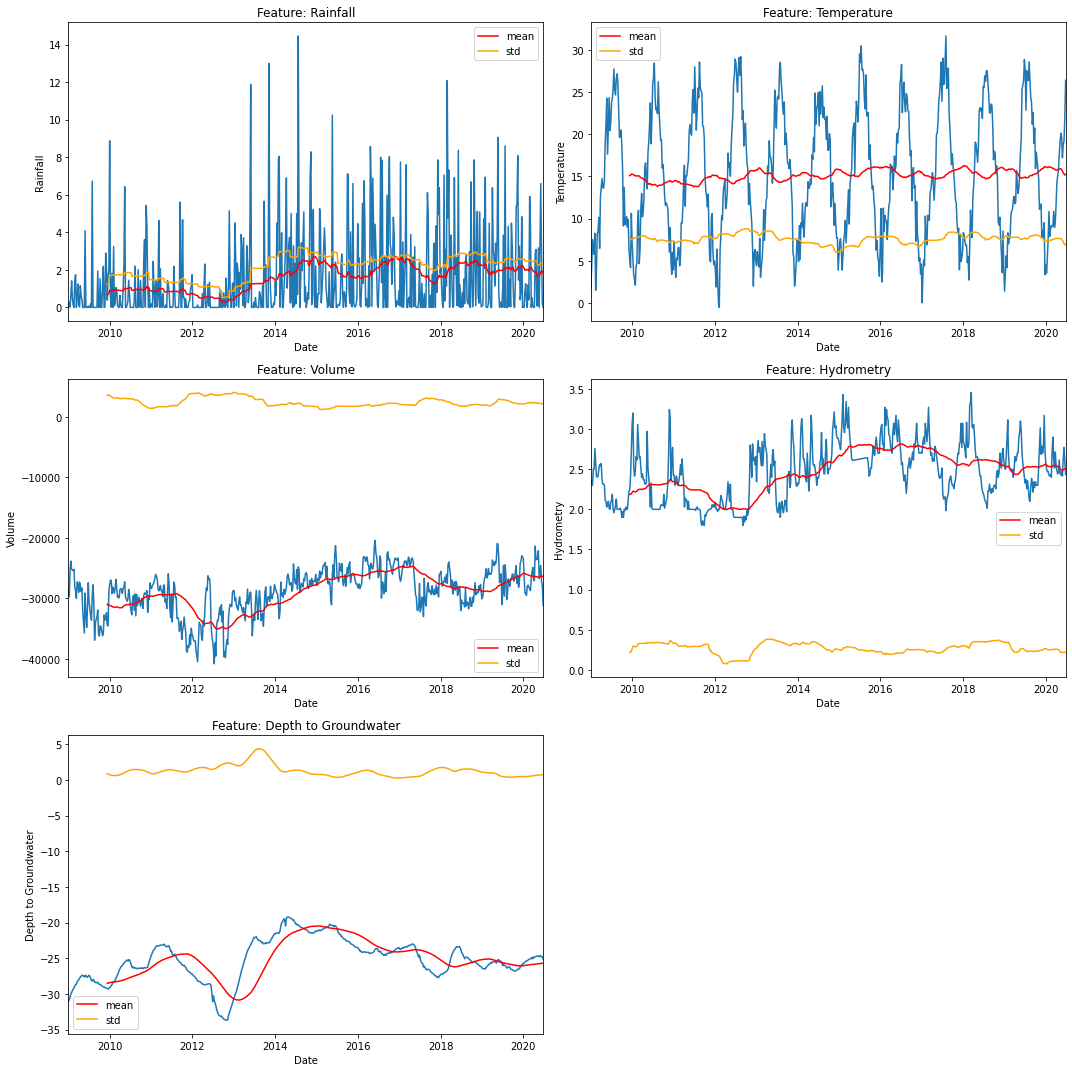

In [62]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 15))

windows = 50

sns.lineplot(x = data.Date, y = data.Rainfall, ax = ax[0, 0])
sns.lineplot(x = data.Date, y = data.Rainfall.rolling(windows).mean(), ax = ax[0, 0],
            color = 'red', label = 'mean')
sns.lineplot(x = data.Date, y = data.Rainfall.rolling(windows).std(), ax = ax[0, 0],
            color = 'orange', label = 'std')
ax[0, 0].set_title('Feature: Rainfall')
ax[0, 0].set_ylabel(ylabel = 'Rainfall')
ax[0, 0].legend()

sns.lineplot(x = data.Date, y = data.Temperature, ax = ax[0, 1])
sns.lineplot(x = data.Date, y = data.Temperature.rolling(windows).mean(), ax = ax[0, 1],
            color = 'red', label = 'mean')
sns.lineplot(x = data.Date, y = data.Temperature.rolling(windows).std(), ax = ax[0, 1],
            color = 'orange', label = 'std')
ax[0, 1].set_title('Feature: Temperature')
ax[0, 1].set_ylabel(ylabel = 'Temperature')
ax[0, 1].legend()

sns.lineplot(x = data.Date, y = data.Volume, ax = ax[1, 0])
sns.lineplot(x = data.Date, y = data.Volume.rolling(windows).mean(), ax = ax[1, 0],
            color = 'red', label = 'mean')
sns.lineplot(x = data.Date, y = data.Volume.rolling(windows).std(), ax = ax[1, 0],
            color = 'orange', label = 'std')
ax[1, 0].set_title('Feature: Volume')
ax[1, 0].set_ylabel(ylabel = 'Volume')
ax[1, 0].legend()

sns.lineplot(x = data.Date, y = data.Hydrometry, ax = ax[1, 1])
sns.lineplot(x = data.Date, y = data.Hydrometry.rolling(windows).mean(), ax = ax[1, 1],
            color = 'red', label = 'mean')
sns.lineplot(x = data.Date, y = data.Hydrometry.rolling(windows).std(), ax = ax[1, 1],
            color = 'orange', label = 'std')
ax[1, 1].set_title('Feature: Hydrometry')
ax[1, 1].set_ylabel(ylabel = 'Hydrometry')
ax[1, 1].legend()

sns.lineplot(x = data.Date, y = data.Depth_to_Groundwater, ax = ax[2, 0])
sns.lineplot(x = data.Date, y = data.Depth_to_Groundwater.rolling(windows).mean(), ax = ax[2, 0],
            color = 'red', label = 'mean')
sns.lineplot(x = data.Date, y = data.Depth_to_Groundwater.rolling(windows).std(), ax = ax[2, 0],
            color = 'orange', label = 'std')
ax[2, 0].set_title('Feature: Depth to Groundwater')
ax[2, 0].set_ylabel(ylabel = 'Depth to Groundwater')
ax[2, 0].legend()

for i in range(3):
    ax[i, 0].set_xlim(min(data.Date), max(data.Date))
    ax[i, 1].set_xlim(min(data.Date), max(data.Date))

fig.delaxes(ax[2, 1]) # remove the empty subplot cell
plt.tight_layout()
plt.show()

## Dickey-Fuller test

In [77]:
result = adfuller(data.Volume.values)

print(result[0], result[1], result[2], result[3], result[4], sep = '\n')

result[4]['1%']

-3.018424524722902
0.033209239632528
9
590
{'1%': -3.4414821678603946, '5%': -2.8664511716874657, '10%': -2.5693855271473716}


-3.4414821678603946

In [88]:
from statsmodels.tsa.stattools import adfuller

# data takes the form of 'data.Attribute' or 'data.Target'
def ADF_test(inputs, ax):
    result = adfuller(inputs.values)
    adf_st = result[0]
    pval   = result[1]
    crit1  = result[4]['1%']
    crit5  = result[4]['5%']
    crit10 = result[4]['10%']
    
    # if H0 is rejected, it will be represented with green or orange. Otherwise, red. 
    # we use 0.05 of critical value.
    if pval < 0.01:
        sns.lineplot(x = data.Date, y = inputs, ax = ax, color = 'green')
    
    elif pval < 0.05:
        sns.lineplot(x = data.Date, y = inputs, ax = ax, color = 'orange')
        
    elif pval > 0.05:
        sns.lineplot(x = data.Date, y = inputs, ax = ax, color = 'red')
    
    ax.set_title('ADF test: {:.3f}, p-value: {:.3f}\nCritical Values 1%: {:.3f}, 5%: {:.3f}, 10% {:.3f}'.format(adf_st, pval, crit1, crit5, crit10))

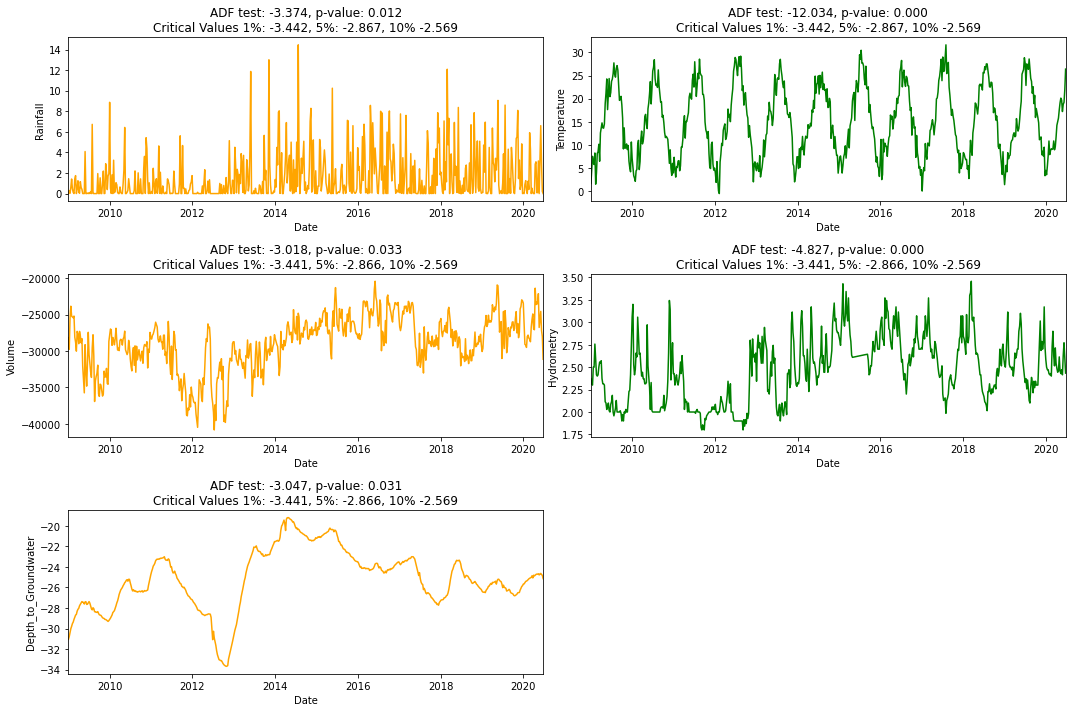

In [89]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))

ADF_test(data.Rainfall, ax = ax[0, 0])
ADF_test(data.Temperature, ax = ax[0, 1])
ADF_test(data.Volume, ax = ax[1, 0])
ADF_test(data.Hydrometry, ax = ax[1, 1])
ADF_test(data.Depth_to_Groundwater, ax = ax[2, 0])

for i in range(3):
    ax[i, 0].set_xlim(min(data.Date), max(data.Date))
    ax[i, 1].set_xlim(min(data.Date), max(data.Date))

fig.delaxes(ax[2, 1]) # remove the empty subplot cell
plt.tight_layout()
plt.show()

From the above plots, we conclude that every attribute and target are 